# **Sentimen Analisis Review APK Mobile Legends: Bang Bang di Play Store**

# Submission Dicoding
# Nanda Arya Putra



In [1]:
import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi

import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia

from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.5 MB/s eta 0:00:00


In [2]:
import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stop words) dalam berbagai bahasa.
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

# Loading Dataset

# Dataset diperoleh dengan scraping mandiri dengan notebook scraping dataset dan diupload secara manual

In [3]:
# Load Dataset yang telag diupload secara manual (Note: Saya mengguanakan Kaggle Notebook)
app_reviews_df = pd.read_csv('/kaggle/input/ulasan-aplikasi-ml/ulasan_aplikasi_ml.csv')

# Menghitung jumlah baris dan kolom dalam DataFrame
jumlah_ulasan, jumlah_kolom = app_reviews_df.shape


In [4]:
# Menampilkan lima baris pertama dari DataFrame app_reviews_df
app_reviews_df.head()

,Review
0,Game dengan matchmaking tersampah yang pernah ...
1,"game nya bagus, menarik, dan grafik nya juga o..."
2,"Moonton sudah tidak sehat, saat draf pick aman..."
3,Banyak banget masalahnya dari tim yang berkedo...
4,Game nya bagus seru dan menantang juga meskipu...


In [5]:
# Menampilkan informasi tentang DataFrame app_reviews_df
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121500 entries, 0 to 121499
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Review  121500 non-null  object
dtypes: object(1)
memory usage: 949.3+ KB


In [6]:
data_content = app_reviews_df['Review']

In [7]:
# Membuat DataFrame baru (clean_df) dengan menghapus baris yang memiliki nilai yang hilang (NaN) dari app_reviews_df
clean_df = data_content.dropna()

In [8]:
# Menampilkan informasi tentang DataFrame clean_df setelah membersihkan nilai yang hilang (NaN)
clean_df.info()

<class 'pandas.core.series.Series'>
Index: 121500 entries, 0 to 121499
Series name: Review
Non-Null Count   Dtype 
--------------   ----- 
121500 non-null  object
dtypes: object(1)
memory usage: 1.9+ MB


In [9]:
# Menghapus baris duplikat dari DataFrame clean_df
clean_df = app_reviews_df.drop_duplicates()

# Menghitung jumlah baris dan kolom dalam DataFrame clean_df setelah menghapus duplikat
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape

## Preprocessing

In [10]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'[^\w\s]', '', text) # remove numbers


    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

    return stemmed_text
def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [11]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [12]:
clean_df

,Review
0,Game dengan matchmaking tersampah yang pernah ...
1,"game nya bagus, menarik, dan grafik nya juga o..."
2,"Moonton sudah tidak sehat, saat draf pick aman..."
3,Banyak banget masalahnya dari tim yang berkedo...
4,Game nya bagus seru dan menantang juga meskipu...
...,...
121495,game ini sangat menyenangkan player nya ramah ...
121496,Makin lama makin banyak bugnya mau login aja g...
121497,Woi muntun kasih lah aku wins dikit ketemu tim...
121498,dari dulu jaringan ga beres ntah apalah kerja ...


In [13]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['Review'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [14]:
clean_df

,Review,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,Game dengan matchmaking tersampah yang pernah ...,Game dengan matchmaking tersampah yang pernah ...,game dengan matchmaking tersampah yang pernah ...,game dengan matchmaking tersampah yang pernah ...,"[game, dengan, matchmaking, tersampah, yang, p...","[game, matchmaking, tersampah, mainin, valoran...",game matchmaking tersampah mainin valorant mai...
1,"game nya bagus, menarik, dan grafik nya juga o...",game nya bagus menarik dan grafik nya juga oke...,game nya bagus menarik dan grafik nya juga oke...,game nya bagus menarik dan grafik nya juga oke...,"[game, nya, bagus, menarik, dan, grafik, nya, ...","[game, bagus, menarik, grafik, oke, main, siny...",game bagus menarik grafik oke main sinyal suka...
2,"Moonton sudah tidak sehat, saat draf pick aman...",Moonton sudah tidak sehat saat draf pick aman ...,moonton sudah tidak sehat saat draf pick aman ...,moonton sudah tidak sehat saat draf pick aman ...,"[moonton, sudah, tidak, sehat, saat, draf, pic...","[moonton, sehat, draf, pick, aman, signal, gam...",moonton sehat draf pick aman signal game ny ja...
3,Banyak banget masalahnya dari tim yang berkedo...,Banyak banget masalahnya dari tim yang berkedo...,banyak banget masalahnya dari tim yang berkedo...,banyak banget masalahnya dari tim yang berkedo...,"[banyak, banget, masalahnya, dari, tim, yang, ...","[banget, tim, berkedok, bocil, sistem, hitam, ...",banget tim berkedok bocil sistem hitam jaringa...
4,Game nya bagus seru dan menantang juga meskipu...,Game nya bagus seru dan menantang juga meskipu...,game nya bagus seru dan menantang juga meskipu...,game nya bagus seru dan menantang juga meskipu...,"[game, nya, bagus, seru, dan, menantang, juga,...","[game, bagus, seru, menantang, terbawa, emosi,...",game bagus seru menantang terbawa emosi tim se...
...,...,...,...,...,...,...,...
121495,game ini sangat menyenangkan player nya ramah ...,game ini sangat menyenangkan player nya ramah ...,game ini sangat menyenangkan player nya ramah ...,game ini sangat menyenangkan player nya ramah ...,"[game, ini, sangat, menyenangkan, player, nya,...","[game, menyenangkan, player, ramah, ramah, kasar]",game menyenangkan player ramah ramah kasar
121496,Makin lama makin banyak bugnya mau login aja g...,Makin lama makin banyak bugnya mau login aja g...,makin lama makin banyak bugnya mau login aja g...,makin lama makin banyak bugnya mau login saja ...,"[makin, lama, makin, banyak, bugnya, mau, logi...","[bugnya, login, masuk]",bugnya login masuk
121497,Woi muntun kasih lah aku wins dikit ketemu tim...,Woi muntun kasih lah aku wins dikit ketemu tim...,woi muntun kasih lah aku wins dikit ketemu tim...,woi muntun kasih lah aku wins dikit ketemu tim...,"[woi, muntun, kasih, lah, aku, wins, dikit, ke...","[muntun, kasih, wins, dikit, ketemu, tim, main...",muntun kasih wins dikit ketemu tim main kalah ...
121498,dari dulu jaringan ga beres ntah apalah kerja ...,dari dulu jaringan ga beres ntah apalah kerja ...,dari dulu jaringan ga beres ntah apalah kerja ...,dari dulu jaringan ga beres ntah apalah kerja ...,"[dari, dulu, jaringan, ga, beres, ntah, apalah...","[jaringan, beres, ntah, apalah, kerja, kasih, ...",jaringan beres ntah apalah kerja kasih skin gr...


##Pelabelan

In [15]:
import csv
import requests
from io import StringIO

# Loads positive lexicon data from GitHub
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Loads negative lexicon data from GitHub
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya ke dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")


In [16]:
# Function to determine sentiment polarity of tweets
# Fungsi untuk menentukan polaritas sentimen dari tweet

def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:

    score = 0
    # Inisialisasi skor sentimen ke 0

    for word in text:
        # Mengulangi setiap kata dalam teks

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    polarity=''
    # Inisialisasi variabel polaritas

    if (score >= 0):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score < 0):
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif

    # else:
    #     polarity = 'neutral'
    # Ini adalah bagian yang bisa digunakan untuk menentukan polaritas netral jika diperlukan

    return score, polarity
    # Mengembalikan skor sentimen dan polaritas teks

In [17]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
negative    75007
positive    46441
Name: count, dtype: int64


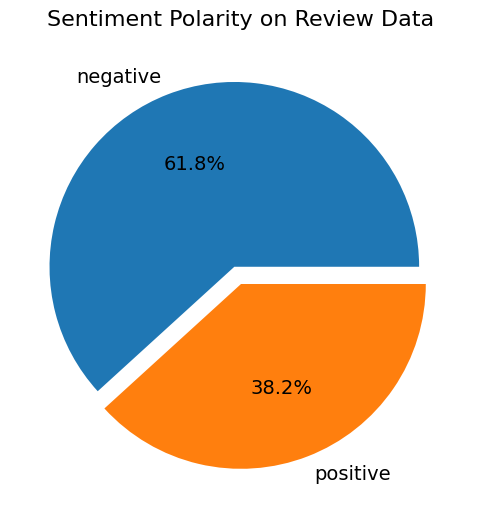

In [18]:
import matplotlib.pyplot as plt

# Membuat objek gambar dan sumbu dengan ukuran (6, 6) inci.
fig, ax = plt.subplots(figsize=(6, 6))

# Mengambil jumlah data polaritas sentimen dari DataFrame 'clean_df' dan menyimpannya dalam list 'sizes'.
sizes = [count for count in clean_df['polarity'].value_counts()]

# Mengambil label atau kategori sentimen dari DataFrame 'clean_df' dan menyimpannya dalam list 'labels'.
labels = list(clean_df['polarity'].value_counts().index)

# Menentukan seberapa jauh potongan dari pie chart akan ditarik (0.1 artinya potongan pertama akan sedikit terpisah).
explode = (0.1, 0)

# Membuat pie chart dengan data 'sizes', 'labels', dan 'explode' yang telah ditentukan.
# Autopct digunakan untuk menampilkan persentase di dalam setiap potongan pie.
# Textprops digunakan untuk mengatur ukuran font teks dalam pie chart.
ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})

# Menetapkan judul untuk pie chart dengan ukuran font dan jarak (padding) tertentu.
ax.set_title('Sentiment Polarity on Review Data', fontsize=16, pad=20)

# Menampilkan pie chart.
plt.show()

In [19]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'positive_tweets' yang hanya berisi tweet dengan polaritas positif.
positive_tweets = clean_df[clean_df['polarity'] == 'positive']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'positive_tweets'.
positive_tweets = positive_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'positive_tweets' berdasarkan 'polarity_score' secara menurun.
positive_tweets = positive_tweets.sort_values(by='polarity_score', ascending=False)

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
positive_tweets = positive_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
positive_tweets.index += 1

In [20]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'negative_tweets' yang hanya berisi tweet dengan polaritas negatif.
negative_tweets = clean_df[clean_df['polarity'] == 'negative']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'negative_tweets'.
negative_tweets = negative_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'negative_tweets' berdasarkan 'polarity_score' secara menaik (ascending).
negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=True)

# Memilih 10 baris pertama dari DataFrame yang sudah diurutkan.
negative_tweets = negative_tweets[0:10]

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
negative_tweets = negative_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
negative_tweets.index += 1

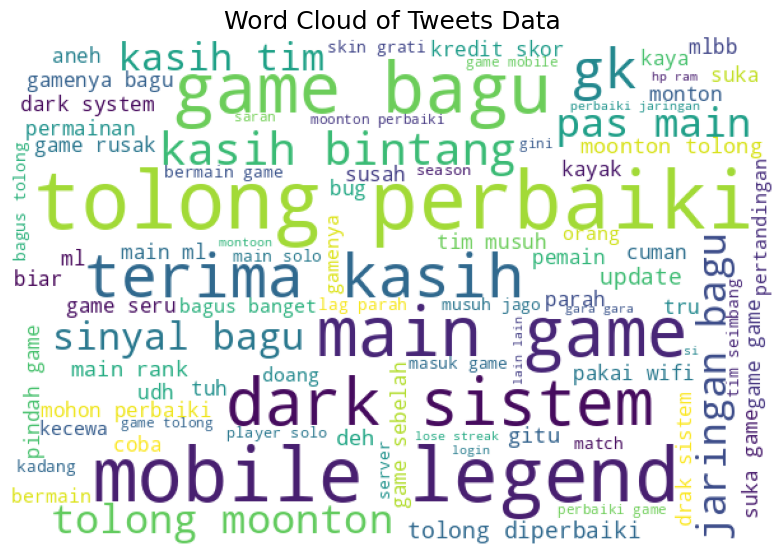

In [21]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'clean_df'.
for tweet in clean_df['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

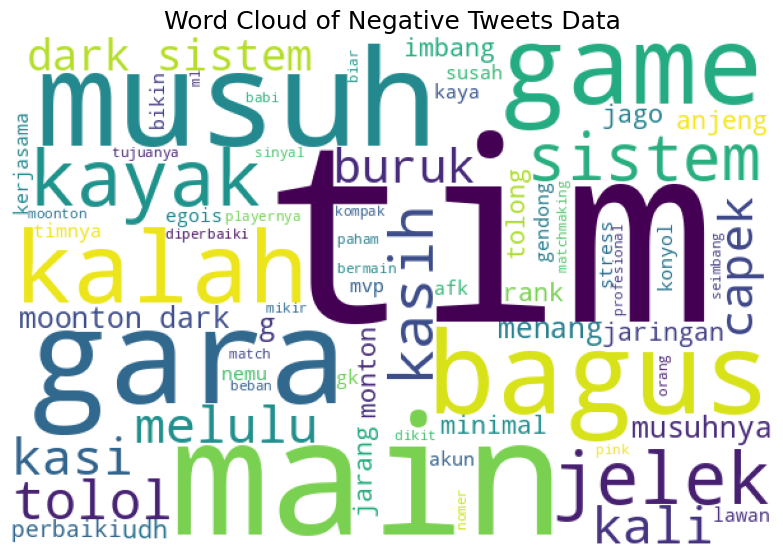

In [22]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet negatif.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'negative_tweets'.
for tweet in negative_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Negative Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

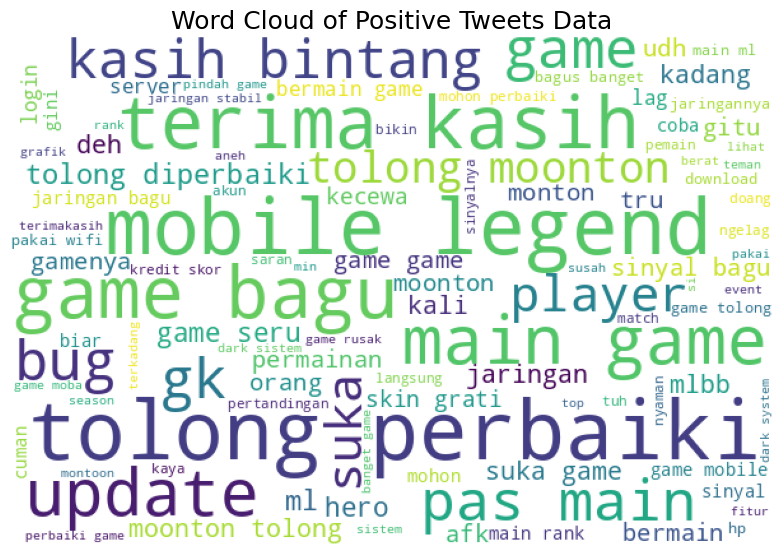

In [23]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet positif.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'positive_tweets'.
for tweet in positive_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Positive Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

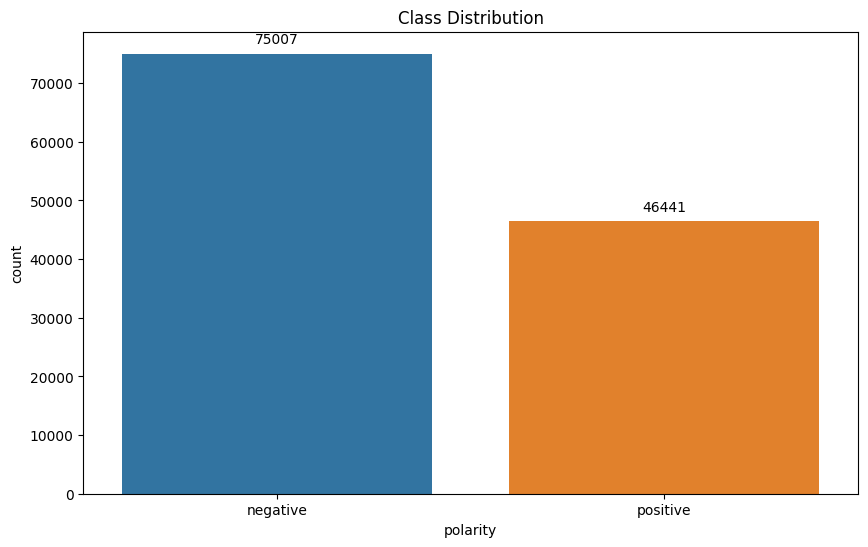

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


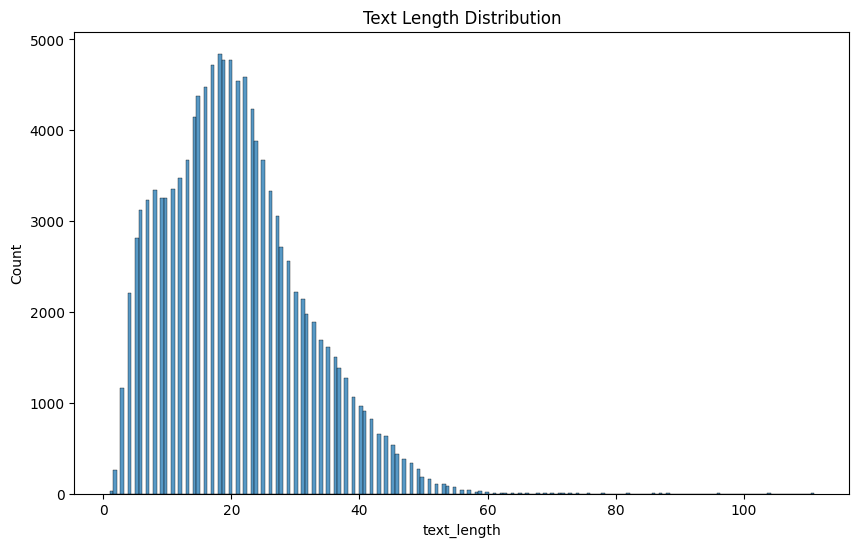

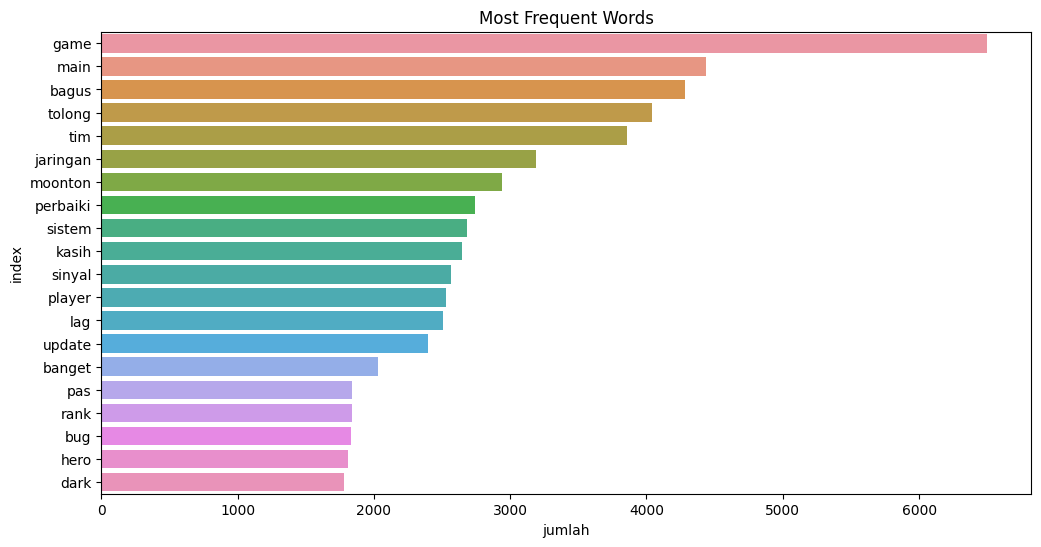

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Set the figure size
plt.figure(figsize=(10, 6))

# Check class distribution
class_dist_plot = sns.countplot(x='polarity', data=clean_df)
plt.title('Class Distribution')

# Add counts above the bars on the plot
for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center',
                              xytext=(0, 10),
                              textcoords='offset points')

plt.show()

# Set the figure size
plt.figure(figsize=(10, 6))

# Visualize text length distribution
clean_df['text_length'] = clean_df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(clean_df['text_length'])
plt.title('Text Length Distribution')
plt.show()

# Set the figure size
plt.figure(figsize=(12, 6))

# Visualize most frequent words
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_df['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Most Frequent Words')
plt.show()

In [25]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score

## **Data Splitting**

In [26]:
clean_df.head(2)

,Review,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,polarity_score,polarity,text_length
0,"Game dengan matchmaking tersampah yang pernah gw mainin. Valorant yang gw mainin aja perbedaan skill dari team kita dan lawan masih bisa seimbang, sedangkan ini game? Kalo menang ya menang bantai, kalo kalah ya kalah banget karna playernya sampah. Juga jaringan yang sekarang tambah buruk, padahal dulu pake wifi + data jaringannya bagus, sekarang masih wifi + data tapi sering jumping sampai 100+ms. Game anehhh",Game dengan matchmaking tersampah yang pernah gw mainin Valorant yang gw mainin aja perbedaan skill dari team kita dan lawan masih bisa seimbang sedangkan ini game Kalo menang ya menang bantai kalo kalah ya kalah banget karna playernya sampah Juga jaringan yang sekarang tambah buruk padahal dulu pake wifi data jaringannya bagus sekarang masih wifi data tapi sering jumping sampai ms Game anehhh,game dengan matchmaking tersampah yang pernah gw mainin valorant yang gw mainin aja perbedaan skill dari team kita dan lawan masih bisa seimbang sedangkan ini game kalo menang ya menang bantai kalo kalah ya kalah banget karna playernya sampah juga jaringan yang sekarang tambah buruk padahal dulu pake wifi data jaringannya bagus sekarang masih wifi data tapi sering jumping sampai ms game anehhh,game dengan matchmaking tersampah yang pernah saya mainin valorant yang saya mainin saja perbedaan skill dari team kita dan lawan masih bisa seimbang sedangkan ini game kalau menang iya menang bantai kalau kalah iya kalah banget karena playernya sampah juga jaringan yang sekarang tambah buruk padahal dulu pakai wifi data jaringannya bagus sekarang masih wifi data tapi sering jumping sampai ms game anehhh,"[game, dengan, matchmaking, tersampah, yang, pernah, saya, mainin, valorant, yang, saya, mainin, saja, perbedaan, skill, dari, team, kita, dan, lawan, masih, bisa, seimbang, sedangkan, ini, game, kalau, menang, iya, menang, bantai, kalau, kalah, iya, kalah, banget, karena, playernya, sampah, juga, jaringan, yang, sekarang, tambah, buruk, padahal, dulu, pakai, wifi, data, jaringannya, bagus, sekarang, masih, wifi, data, tapi, sering, jumping, sampai, ms, game, anehhh]","[game, matchmaking, tersampah, mainin, valorant, mainin, perbedaan, skill, team, lawan, seimbang, game, menang, menang, bantai, kalah, kalah, banget, playernya, sampah, jaringan, buruk, pakai, wifi, data, jaringannya, bagus, wifi, data, jumping, ms, game, anehhh]",game matchmaking tersampah mainin valorant mainin perbedaan skill team lawan seimbang game menang menang bantai kalah kalah banget playernya sampah jaringan buruk pakai wifi data jaringannya bagus wifi data jumping ms game anehhh,-34,negative,33
1,"game nya bagus, menarik, dan grafik nya juga oke, tapi ada beberapa masalah, akhir akhir ini saya kalo main sinyal suka merah, kalo kata orang orang si karena bawaan update, tapi ya saya juga gatau pasti. terus kalo saya main, tim dan lawan nya tidak setara, tim saya penghuni asli, sedangkan musuh ex imo, dan tadi pas saya main ko saya tidak bisa on mic dan ngetik ya saat in game? sedangkan teman saya bisa. tolong di perbaiki ya moonton, saya mau komunikasi di in game jadi susah. terimakasih 🙏",game nya bagus menarik dan grafik nya juga oke tapi ada beberapa masalah akhir akhir ini saya kalo main sinyal suka merah kalo kata orang orang si karena bawaan update tapi ya saya juga gatau pasti terus kalo saya main tim dan lawan nya tidak setara tim saya penghuni asli sedangkan musuh ex imo dan tadi pas saya main ko saya tidak bisa on mic dan ngetik ya saat in game sedangkan teman saya bisa tolong di perbaiki ya moonton saya mau komunikasi di in game jadi susah terimakasih,game nya bagus menarik dan grafik nya juga oke tapi ada beberapa masalah akhir akhir ini saya kalo main sinyal suka merah kalo kata orang orang si karena bawaan update tapi ya saya juga gatau pasti terus kalo saya main tim dan lawan nya tidak setara tim saya penghuni asli 

In [27]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = clean_df['text_akhir']
y = clean_df['polarity']

In [28]:
# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=1500, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

In [29]:
# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

,abadi,abang,acak,adain,adakan,adil,admin,aduh,advance,afk,...,wkwk,wkwkwk,wr,ws,yaaa,yah,yh,yng,youtube,yt
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121443,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# **Logistic Regression**

In [31]:
from sklearn.linear_model import LogisticRegression

# Membuat objek model Logistic Regression
logistic_regression = LogisticRegression()

# Melatih model Logistic Regression pada data pelatihan
logistic_regression.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr = logistic_regression.predict(X_train.toarray())
y_pred_test_lr = logistic_regression.predict(X_test.toarray())

# Evaluasi akurasi model Logistic Regression pada data pelatihan
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)

# Evaluasi akurasi model Logistic Regression pada data uji
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)

# Menampilkan akurasi
print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - accuracy_train: 0.9374421046131044
Logistic Regression - accuracy_test: 0.9296829971181556


# **Support Vector Machine (SVM)**

In [32]:
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score

# Create an SVC object with a linear kernel (you can experiment with other kernels)
svm_model = SVC(kernel='linear')

# Train the SVM model on the training data
svm_model.fit(X_train.toarray(), y_train)

# Predict sentiment on the training and testing data
y_pred_train_svm = svm_model.predict(X_train.toarray())
y_pred_test_svm = svm_model.predict(X_test.toarray())

# Evaluate the accuracy of the SVM model
accuracy_train_svm = accuracy_score(y_pred_train_svm, y_train)
accuracy_test_svm = accuracy_score(y_pred_test_svm, y_test)

# Print the accuracy scores
print('SVM - accuracy_train:', accuracy_train_svm)
print('SVM - accuracy_test:', accuracy_test_svm)

SVM - accuracy_train: 0.9435146874163733
SVM - accuracy_test: 0.9341292713050638


# **Linear Support Vector Classification (LinearSVC)**

In [33]:
from sklearn.svm import LinearSVC

# Create a LinearSVC classifier
svc_model = LinearSVC()

# Train the LinearSVC model on the training data
svc_model.fit(X_train.toarray(), y_train)

# Predict sentiment on the training and testing data
y_pred_train_svc = svc_model.predict(X_train.toarray())
y_pred_test_svc = svc_model.predict(X_test.toarray())

# Evaluate the accuracy of the LinearSVC model
accuracy_train_svc = accuracy_score(y_pred_train_svc, y_train)
accuracy_test_svc = accuracy_score(y_pred_test_svc, y_test)

# Print the accuracy scores
print('LinearSVC - accuracy_train:', accuracy_train_svc)
print('LinearSVC - accuracy_test:', accuracy_test_svc)

LinearSVC - accuracy_train: 0.9469009242676877
LinearSVC - accuracy_test: 0.9359818855496089


# **Convolutional Neural Network (CNN)**

In [34]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout # Added Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

# Label Encoding
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Ensure Correct Data Types
y_train = np.array(y_train).astype(int)
y_test = np.array(y_test).astype(int)

# TF-IDF vectorized data
X_train_tfidf = X_train 
X_test_tfidf = X_test  

# Convert sparse matrices to dense arrays
X_train_dense = X_train_tfidf.toarray() 
X_test_dense = X_test_tfidf.toarray() 

# Determine input shape based on the dense array
input_shape = X_train_dense.shape[1] 

# CNN Model
model_cnn = Sequential()
model_cnn.add(Dense(128, activation='relu', input_shape=(input_shape,)))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dropout(0.3))
model_cnn.add(Dense(1, activation='sigmoid'))

model_cnn.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model (using dense arrays)
model_cnn.fit(X_train_dense, y_train, epochs=20, batch_size=32, validation_split = 0.1)

# Evaluation (using dense arrays)
y_pred_train_cnn = model_cnn.predict(X_train_dense)
y_pred_test_cnn = model_cnn.predict(X_test_dense)

# Convert probabilities to labels
y_pred_train_label_cnn = (y_pred_train_cnn > 0.5).astype(int)
y_pred_test_label_cnn = (y_pred_test_cnn > 0.5).astype(int)

accuracy_train_cnn = accuracy_score(y_train, y_pred_train_label_cnn)
accuracy_test_cnn = accuracy_score(y_test, y_pred_test_label_cnn)

print('CNN - accuracy_train:', accuracy_train_cnn)
print('CNN - accuracy_test:', accuracy_test_cnn)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
2733/2733 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8227 - loss: 0.3544 - val_accuracy: 0.9274 - val_loss: 0.1898
Epoch 2/20
2733/2733 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9249 - loss: 0.1905 - val_accuracy: 0.9259 - val_loss: 0.1918
Epoch 3/20
2733/2733 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9367 - loss: 0.1653 - val_accuracy: 0.9312 - val_loss: 0.1857
Epoch 4/20
2733/2733 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9434 - loss: 0.1493 - val_accuracy: 0.9294 - val_loss: 0.1861
Epoch 5/20
2733/2733 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9539 - loss: 0.1282 - val_accuracy: 0.9303 - val_loss: 0.1863
Epoch 6/20
2733/2733 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9574 - loss: 0.1177 - val_accuracy: 0.9284 - val_loss: 0.1971
Epoch 7/20
2733/2733 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9633 - loss: 0.1056 - val_accuracy: 0.9283 - val_loss: 0.2005
Epoch 8/20
2733/2733 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9662 - loss: 0.0949 

# **RNN-Long Short-Term Memory (LSTM)**

In [35]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Label Encoding
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# TF-IDF vectorized data
X_train_tfidf = X_train
X_test_tfidf = X_test

# Convert sparse matrices to dense arrays
X_train_dense = X_train_tfidf.toarray()
X_test_dense = X_test_tfidf.toarray()

# Reshape data for LSTM
X_train_reshaped = X_train_dense.reshape(X_train_dense.shape[0], 1, X_train_dense.shape[1])
X_test_reshaped = X_test_dense.reshape(X_test_dense.shape[0], 1, X_test_dense.shape[1])

# Determine input shape
input_shape = (1, X_train_reshaped.shape[2])

# LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(64, input_shape=input_shape, return_sequences=True))  
model_lstm.add(Dropout(0.3))  
model_lstm.add(LSTM(32))      
model_lstm.add(Dense(1, activation='sigmoid')) 

model_lstm.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

model_lstm.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Evaluation (using reshaped data)
y_pred_train_lstm = model_lstm.predict(X_train_reshaped)
y_pred_test_lstm = model_lstm.predict(X_test_reshaped)

# Convert probabilities to labels
y_pred_train_label_lstm = (y_pred_train_lstm > 0.5).astype(int)
y_pred_test_label_lstm = (y_pred_test_lstm > 0.5).astype(int)

accuracy_train_lstm = accuracy_score(y_train, y_pred_train_label_lstm)
accuracy_test_lstm = accuracy_score(y_test, y_pred_test_label_lstm)

print('LSTM - accuracy_train:', accuracy_train_lstm)
print('LSTM - accuracy_test:', accuracy_test_lstm)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
2733/2733 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.8284 - loss: 0.3480 - val_accuracy: 0.9244 - val_loss: 0.1895
Epoch 2/20
2733/2733 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.9297 - loss: 0.1818 - val_accuracy: 0.9296 - val_loss: 0.1820
Epoch 3/20
2733/2733 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.9324 - loss: 0.1761 - val_accuracy: 0.9321 - val_loss: 0.1806
Epoch 4/20
2733/2733 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.9358 - loss: 0.1687 - val_accuracy: 0.9274 - val_loss: 0.1834
Epoch 5/20
2733/2733 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.9404 - loss: 0.1597 - val_accuracy: 0.9367 - val_loss: 0.1780
Epoch 6/20
2733/2733 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.9412 - loss: 0.1593 - val_accuracy: 0.9337 - val_loss: 0.1791
Epoch 7/20
2733/2733 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.9421 - loss: 0.1535 - val_accuracy: 0.9359 - val_loss: 0.1833
Epoch 8/20
2733/2733 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.9478 - loss: 0

# **Bidirectional RNN**

In [36]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Label Encoding
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# TF-IDF vectorized data
X_train_tfidf = X_train
X_test_tfidf = X_test

# Convert sparse matrices to dense arrays
X_train_dense = X_train_tfidf.toarray()
X_test_dense = X_test_tfidf.toarray()

# Reshape data for RNN
X_train_reshaped = X_train_dense.reshape(X_train_dense.shape[0], 1, X_train_dense.shape[1])
X_test_reshaped = X_test_dense.reshape(X_test_dense.shape[0], 1, X_test_dense.shape[1])

# Determine input shape
input_shape = (1, X_train_reshaped.shape[2])

# Bidirectional RNN Model
model_birnn = Sequential()
model_birnn.add(Bidirectional(SimpleRNN(64, return_sequences=True), input_shape=input_shape))
model_birnn.add(Dropout(0.3))
model_birnn.add(Bidirectional(SimpleRNN(32))) 
model_birnn.add(Dropout(0.3))
model_birnn.add(Dense(1, activation='sigmoid'))

model_birnn.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

model_birnn.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Evaluation
y_pred_train_birnn = model_birnn.predict(X_train_reshaped)
y_pred_test_birnn = model_birnn.predict(X_test_reshaped)

# Convert probabilities to labels
y_pred_train_label_birnn = (y_pred_train_birnn > 0.5).astype(int)
y_pred_test_label_birnn = (y_pred_test_birnn > 0.5).astype(int)

accuracy_train_birnn = accuracy_score(y_train, y_pred_train_label_birnn)
accuracy_test_birnn = accuracy_score(y_test, y_pred_test_label_birnn)

print('Bidirectional RNN - accuracy_train:', accuracy_train_birnn)
print('Bidirectional RNN - accuracy_test:', accuracy_test_birnn)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
2733/2733 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.8548 - loss: 0.3095 - val_accuracy: 0.9214 - val_loss: 0.2019
Epoch 2/20
2733/2733 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.9228 - loss: 0.1982 - val_accuracy: 0.9247 - val_loss: 0.1948
Epoch 3/20
2733/2733 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.9280 - loss: 0.1856 - val_accuracy: 0.9309 - val_loss: 0.1854
Epoch 4/20
2733/2733 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9313 - loss: 0.1821 - val_accuracy: 0.9332 - val_loss: 0.1843
Epoch 5/20
2733/2733 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9323 - loss: 0.1803 - val_accuracy: 0.9348 - val_loss: 0.1776
Epoch 6/20
2733/2733 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9354 - loss: 0.1739 - val_accuracy: 0.9376 - val_loss: 0.1756
Epoch 7/20
2733/2733 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9374 - loss: 0.1710 - val_accuracy: 0.9371 - val_loss: 0.1752
Epoch 8/20
2733/2733 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9385 - loss: 0

In [37]:
import pandas as pd

# Membuat DataFrame untuk hasil akurasi
results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machine (SVM)', 'Linear Support Vector Classification (LinearSVC)', 'Convolutional Neural Network (CNN)', 'RNN-Long Short-Term Memory (LSTM)', 'Bidirectional RNN'],
    'Accuracy Train': [accuracy_train_lr, accuracy_train_svm, accuracy_train_svc, accuracy_train_cnn, accuracy_train_lstm, accuracy_train_birnn],
    'Accuracy Test': [accuracy_test_lr, accuracy_test_svm, accuracy_test_svc, accuracy_test_cnn, accuracy_test_lstm, accuracy_test_birnn]
})
# Menampilkan hanya kolom "Accuracy Test"
accuracy_test_only = results_df[['Model', 'Accuracy Test']]
print(accuracy_test_only)

                                              Model  Accuracy Test
0                               Logistic Regression       0.929683
1                      Support Vector Machine (SVM)       0.934129
2  Linear Support Vector Classification (LinearSVC)       0.935982
3                Convolutional Neural Network (CNN)       0.916015
4                 RNN-Long Short-Term Memory (LSTM)       0.922931
5                                 Bidirectional RNN       0.936846


In [38]:
# Mengurutkan DataFrame berdasarkan kolom "Accuracy Test" dari tertinggi ke terendah
accuracy_test_sorted = accuracy_test_only.sort_values(by='Accuracy Test', ascending=False)

# Menampilkan DataFrame yang telah diurutkan
print(accuracy_test_sorted)

                                              Model  Accuracy Test
5                                 Bidirectional RNN       0.936846
2  Linear Support Vector Classification (LinearSVC)       0.935982
1                      Support Vector Machine (SVM)       0.934129
0                               Logistic Regression       0.929683
4                 RNN-Long Short-Term Memory (LSTM)       0.922931
3                Convolutional Neural Network (CNN)       0.916015


# Inference Model

In [39]:
import pandas as pd
import numpy as np

# Kalimat-kalimat yang akan diuji ke model
kalimat_baru_list = [
    "Game ini benar-benar membuat saya jengkel.",
    "Game ini sangat menyenangkan untuk dimainkan.",
    "Game ini sangat buruk."
]

# Inisialisasi list untuk menyimpan hasil prediksi
hasil_prediksi = []

# Loop melalui setiap kalimat
for kalimat_baru in kalimat_baru_list:
    # Preprocessing kalimat baru
    kalimat_baru_cleaned = cleaningText(kalimat_baru)
    kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)
    kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_casefolded)
    kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
    kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)
    kalimat_baru_final = toSentence(kalimat_baru_filtered)

    # TF-IDF Vectorization
    X_kalimat_baru = tfidf.transform([kalimat_baru_final])

    # Reshape untuk LSTM dan Bidirectional RNN
    X_kalimat_baru_lstm = X_kalimat_baru.toarray().reshape(1, 1, X_kalimat_baru.shape[1])

    # Melakukan prediksi untuk setiap model
    prediksi_lr = logistic_regression.predict(X_kalimat_baru.toarray())
    prediksi_svm = svm_model.predict(X_kalimat_baru.toarray())
    prediksi_svc = svc_model.predict(X_kalimat_baru.toarray())
    prediksi_cnn = model_cnn.predict(X_kalimat_baru.toarray())
    prediksi_lstm = model_lstm.predict(X_kalimat_baru_lstm)
    prediksi_birnn = model_birnn.predict(X_kalimat_baru_lstm)

    # Menyimpan hasil prediksi untuk setiap kalimat
    hasil_prediksi.append({
        "Kalimat": kalimat_baru,
        "Logistic Regression": "POSITIF" if prediksi_lr[0] == 1 else "NEGATIF",
        "SVM": "POSITIF" if prediksi_svm[0] == 1 else "NEGATIF",
        "LinearSVC": "POSITIF" if prediksi_svc[0] == 1 else "NEGATIF",
        "CNN": "POSITIF" if (prediksi_cnn[0] > 0.5) else "NEGATIF",
        "LSTM": "POSITIF" if (prediksi_lstm[0] > 0.5) else "NEGATIF",
        "Bidirectional RNN": "POSITIF" if (prediksi_birnn[0] > 0.5) else "NEGATIF"
    })

# Menampilkan hasil prediksi untuk setiap kalimat dan model
for hasil in hasil_prediksi:
    print("Kalimat:", hasil["Kalimat"])
    print("Hasil Prediksi:")
    for model, prediksi in hasil.items():
        if model != "Kalimat":
            print(f"- {model}: {prediksi}")
    print("-" * 20)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Kalimat: Game ini benar-benar membuat saya jengkel.
Hasil Prediksi:
- Logistic Regression: NEGATIF
- SVM: NEGATIF
- LinearSVC: NEGATIF
- CNN: NEGATIF
- LSTM: NEGATIF
- Bidirectional RNN: NEGATIF
--------------------
Kalimat: Game ini sangat menyenangkan untuk dimainkan.
Hasil Prediksi:
- Logistic Regression: NEGATIF
- SVM: NEGATIF
- LinearSVC: NEGATIF
- CNN: POSITIF
- LSTM: POSITIF
- Bidirectional RNN: POSITIF
--------------------
Kalimat: Game ini sangat buruk.
Hasil Prediksi:
- Logistic Regression: NEGATIF
- SVM: NEGATIF
- LinearSVC: NEGATIF
- CNN: NEGATIF
- LSTM: NEGATIF
- Bidirectional RNN: NEGATIF
--------------------
